# Statistics

2 tools of statistics:

1. Descriptive 
2. Inferential

In [ ]:
                     Statistics
        Descriptive                Inferential
    Univariate                          Hypothesis Testing
    Bivariate                           Model Fitting
    Multivariate

In [ ]:
Univarite - single variables

Bivariate - 2 variables, example: - correlation and covariance

Multivariate - correlation matrix and covariance matrix

In [ ]:
Univarite

1. Measure of Frequency - tables and histogram

2. Central Tendency - mean, median, mode

others- Geomatric Mean
      - Harmonic Mean

3. Measure of Dispersion

In [ ]:
Central Tendency - mean, median, mode


Mean

60 10 20 40 50 1000


Discrete data - start rating

Continuous Data - range

In [ ]:
Median

- 50%
- Sort


10 20 40 50 60 70 1000

ordinal data - good     bad     ugly     very ugly

In [ ]:
Mode

Votes in an election



In [ ]:
Measure of Dispersion

Range - (max - min)

Inter Quartile range ->   75% - 25%

Variance ->  (mean - x)**2 / N

Standard Deviation -> root((mean - x)**2 / N)

# Central Tendancy on Forbes data

In [2]:
import statistics

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("forbes.csv")
df.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [4]:
df.isnull().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

In [5]:
df.dropna(inplace = True)

df.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [6]:
df.shape

(1508, 9)

In [7]:
df_mean = df['Market Value'].mean()
df_mean

26.978494031830238

In [8]:
df_median = df['Market Value'].median()
df_median

13.1

In [9]:
df['Sector'].value_counts()

Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: Sector, dtype: int64

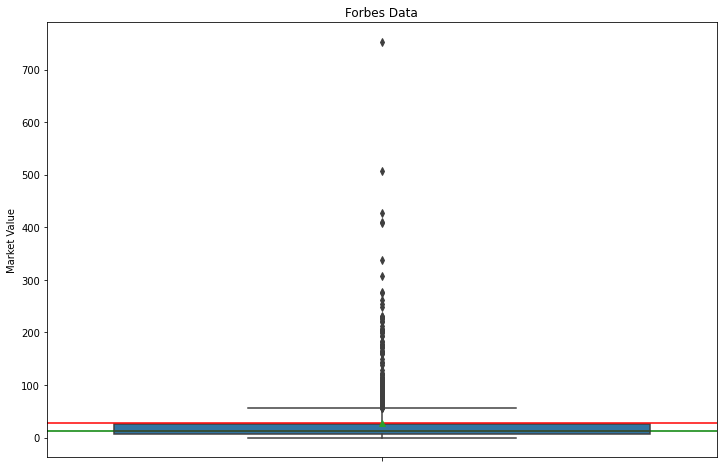

In [10]:
plt.figure(figsize = (12,8))

sns.boxplot(data=df, y='Market Value', showmeans=True)

plt.axhline(y = df_mean, color='r', linestyle='-')
plt.axhline(y = df_median, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

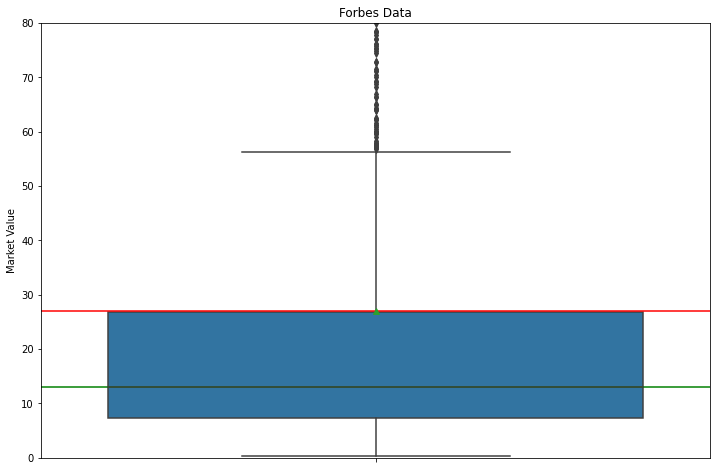

In [11]:
plt.figure(figsize = (12,8))

sns.boxplot(data=df, y='Market Value', showmeans=True)

plt.ylim(0,80)

plt.axhline(y = df_mean, color='r', linestyle='-')
plt.axhline(y = df_median, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

In [12]:
gd = df.groupby('Sector', as_index=False).count()

gd.head()

,Sector,Rank,Company,Country,Sales,Profits,Assets,Market Value,Industry
0,Consumer Discretionary,209,209,209,209,209,209,209,209
1,Consumer Staples,106,106,106,106,106,106,106,106
2,Energy,79,79,79,79,79,79,79,79
3,Financials,474,474,474,474,474,474,474,474
4,Health Care,71,71,71,71,71,71,71,71


In [13]:
gd = gd[['Sector', 'Rank']]

gd = gd.sort_values(by='Rank', ascending=False)

gd

,Sector,Rank
3,Financials,474
0,Consumer Discretionary,209
5,Industrials,192
7,Materials,145
1,Consumer Staples,106
6,Information Technology,103
9,Utilities,86
2,Energy,79
4,Health Care,71
8,Telecommunication Services,43


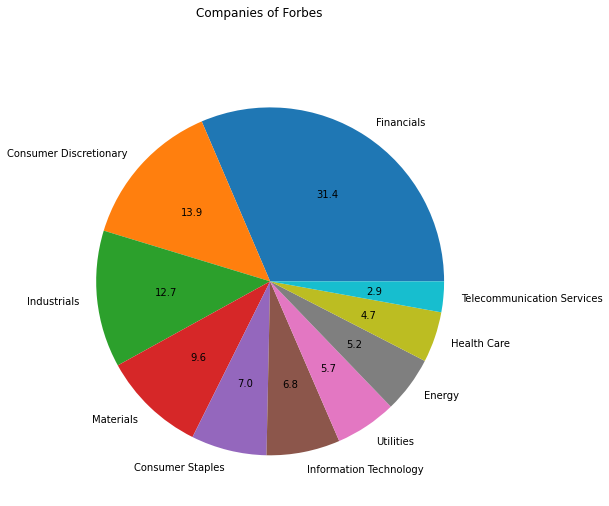

In [17]:
plt.figure(figsize=(12,8))

plt.pie(gd['Rank'], labels=gd['Sector'], autopct='%.1f')

plt.suptitle('Companies of Forbes')

plt.show()

In [18]:
df.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [19]:
profit_max = df['Profits'].max()
profit_max

45.2

In [20]:
profit_min = df['Profits'].min()
profit_min

-13.0

In [21]:
profit_max - profit_min

58.2

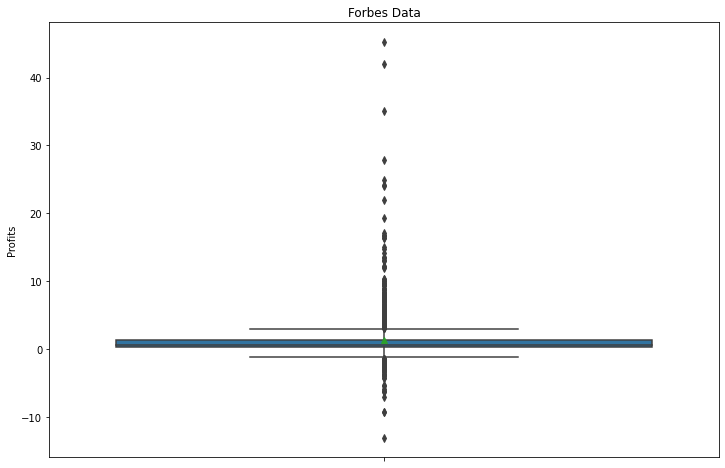

In [22]:
plt.figure(figsize = (12,8))

sns.boxplot(data=df, y='Profits', showmeans=True)

plt.title('Forbes Data')

plt.show()

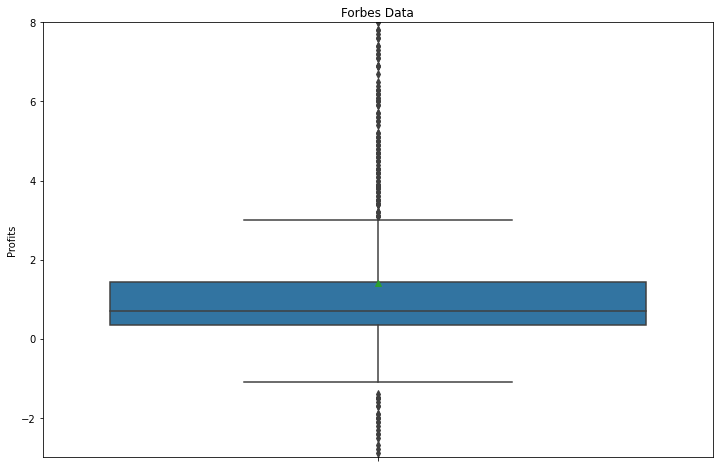

In [23]:
plt.figure(figsize = (12,8))

sns.boxplot(data=df, y='Profits', showmeans=True)

plt.title('Forbes Data')
plt.ylim(-3,8)

plt.show()

In [25]:
Q1 = np.quantile(df['Profits'], 0.25)

Q1

0.34975

In [26]:
Q3 = np.quantile(df['Profits'], 0.75)

Q3

1.4249999999999998

In [27]:
IQR = Q3 - Q1
IQR

1.0752499999999998

In [28]:
profit_std = df['Profits'].std()
profit_std

3.244201278603241

In [29]:
profit_variance = profit_std ** 2
profit_variance

10.524841936090903

In [30]:
df.describe()

,Rank,Sales,Profits,Assets,Market Value
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,909.135279,19.623046,1.407430,97.647016,26.978494
std,554.044456,30.875809,3.244201,287.036157,47.099541
min,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,433.750000,4.900000,0.349750,12.800000,7.300000
50%,883.500000,10.300000,0.692500,25.900000,13.100000
75%,1354.250000,19.900000,1.425000,60.325000,26.900000
max,1999.000000,485.300000,45.200000,3473.200000,752.000000


# Probability

In [32]:
import random

In [33]:
def flip(n):
    
    result = []
    for i in range(1, n + 1):
        result.append(random.choice(['Heads', 'Tails']))
    
    return result

In [37]:
r = flip(10)

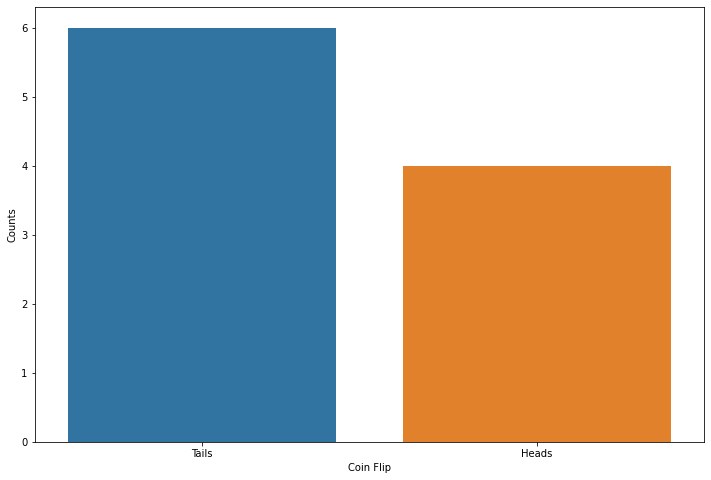

In [38]:
plt.figure(figsize=(12,8))

sns.countplot(x=r)

plt.xlabel('Coin Flip')

plt.ylabel('Counts')
plt.show()

In [39]:
r = flip(100)

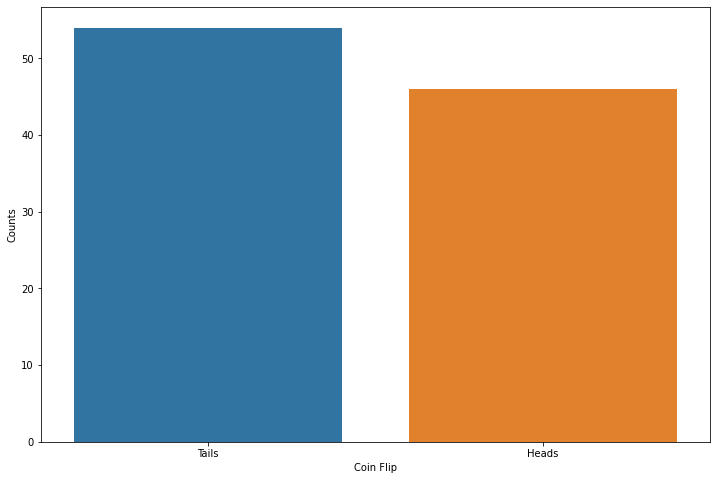

In [40]:
plt.figure(figsize=(12,8))

sns.countplot(x=r)

plt.xlabel('Coin Flip')

plt.ylabel('Counts')
plt.show()

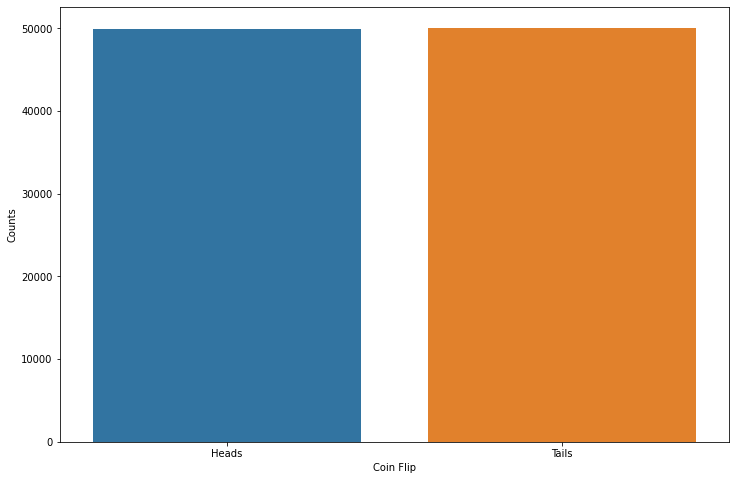

In [41]:
r = flip(100000)

plt.figure(figsize=(12,8))

sns.countplot(x=r)

plt.xlabel('Coin Flip')

plt.ylabel('Counts')
plt.show()

In [42]:
def roll(n):
    
    result = []
    for i in range(1, n + 1):
        result.append(random.choice([1,2,3,4,5,6]))
    
    return result

In [43]:
r = roll(10)
r

[6, 1, 4, 3, 4, 3, 6, 5, 6, 3]

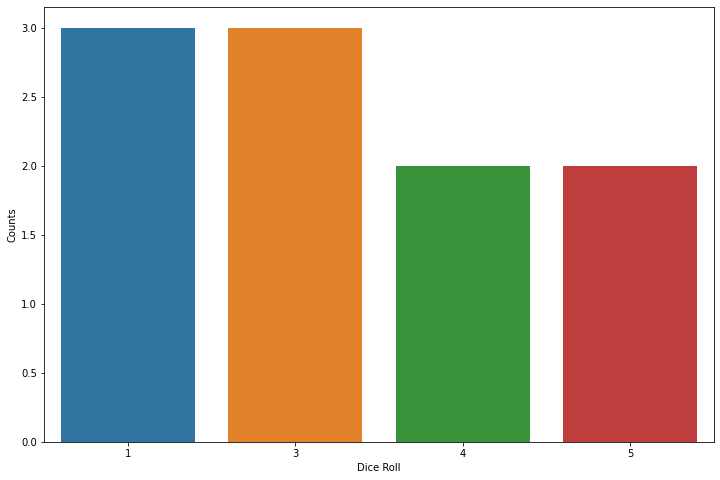

In [44]:
r = roll(10)

plt.figure(figsize=(12,8))

sns.countplot(x=r)

plt.xlabel('Dice Roll')

plt.ylabel('Counts')
plt.show()

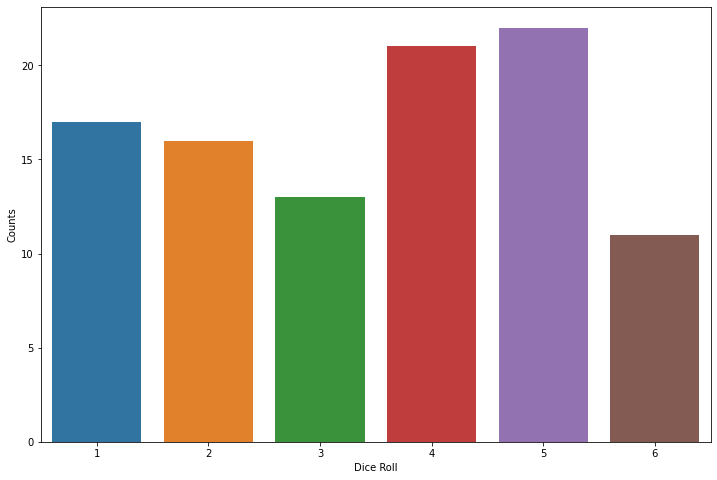

In [45]:
r = roll(100)

plt.figure(figsize=(12,8))

sns.countplot(x=r)

plt.xlabel('Dice Roll')

plt.ylabel('Counts')
plt.show()

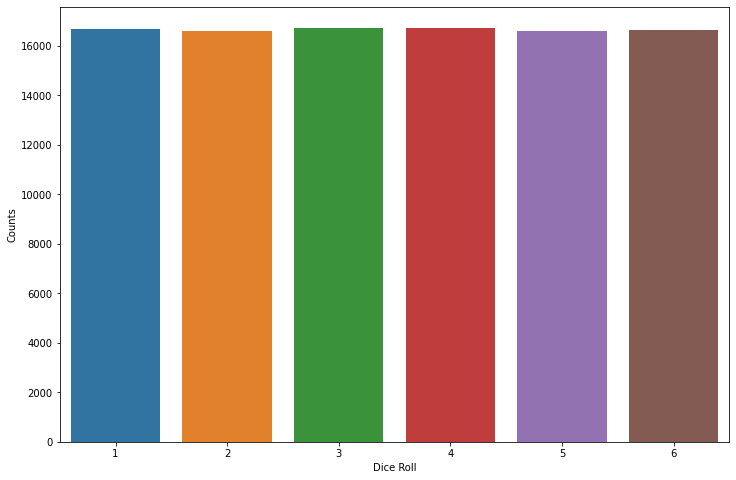

In [46]:
r = roll(100000)

plt.figure(figsize=(12,8))

sns.countplot(x=r)

plt.xlabel('Dice Roll')

plt.ylabel('Counts')
plt.show()

# Normal Distribution

In [49]:
!pip install statsmodels

In [51]:
from scipy import stats

#import statsmodels.api as sm
from scipy.stats import norm


In [52]:
np.random.normal?

In [53]:
normally_distributed_data = np.random.normal(loc=0, scale=1, size=100000)
normally_distributed_data[:10]

array([-0.34566328, -1.29998419, -0.03405265, -0.49943488, -0.39556947,
       -1.07891011,  1.2901002 ,  1.51207901, -0.02495042, -1.0975419 ])

In [54]:
sample_mean = np.mean(normally_distributed_data)
sample_mean

-0.0019250270505892322

In [55]:
sample_median = np.median(normally_distributed_data)
sample_median

0.0018176533006080031

In [56]:
sample_std = np.std(normally_distributed_data)
sample_std

0.9997103338736284

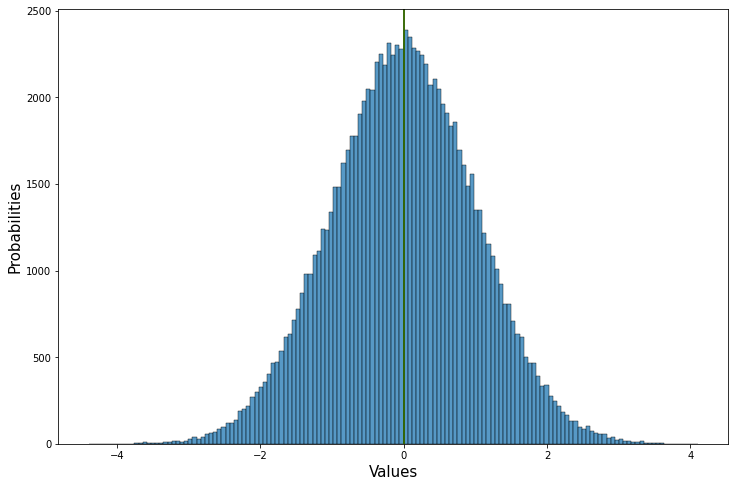

In [58]:
plt.figure(figsize = (12,8))

sns.histplot(x=normally_distributed_data)

plt.axvline(x = sample_mean, color='r', linestyle='-')
plt.axvline(x = sample_median, color='g', linestyle='-')

plt.xlabel('Values', fontsize='15')
plt.ylabel('Probabilities', fontsize='15')

plt.show()